# Maximum Independent Set Problem

$$
\begin{align}
    \text{max} \quad & \sum_{i \in N} x_{i} \\
    \text{s.t} \quad & x_{i} + x_{j} \leq 1 & \forall \; i, j \in E \\
\end{align}
$$

In [1]:
import pyomo.environ as pyo
import matplotlib.pyplot as plt

from gcol.dataloader import load_instance
from mis.heuristic import GreedyChoice, MultiRandom, RandomChoice
from mis.ilp import ilp_mis_from_graph
from mis.plot import draw_from_nodes, draw_selection_gif

In [2]:
N_POINTS = 32
data = load_instance(f"instances/input_{N_POINTS}.txt")

## Heuristics

### Random selection

In [3]:
randsimple = RandomChoice(data["edges"], data["nodes"], seed=12)
randsimple()
print(randsimple.cost)

5


### Greedy

In [4]:
greedy = GreedyChoice(data["edges"], data["nodes"])
greedy()
print(greedy.cost)

5


### Multistart Random selection

In [5]:
randmulti = MultiRandom(data["edges"], data["nodes"], seed=12)
randmulti(n_iter=30)
print(randmulti.cost)

6


### Plots

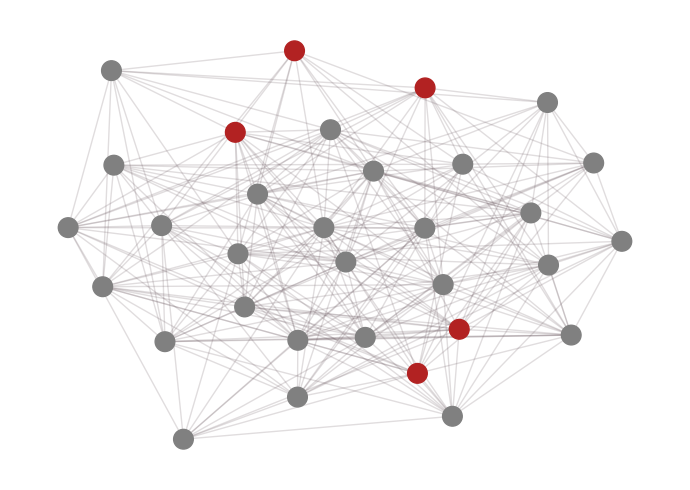

In [6]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=100)
draw_from_nodes(randsimple.nodelist, ax=ax, plot_margins=False, use_labels=0, edge_alpha=0.2, edge_color="#68555D", layout_iter=1000, seed=12)
fig.tight_layout()
plt.show()

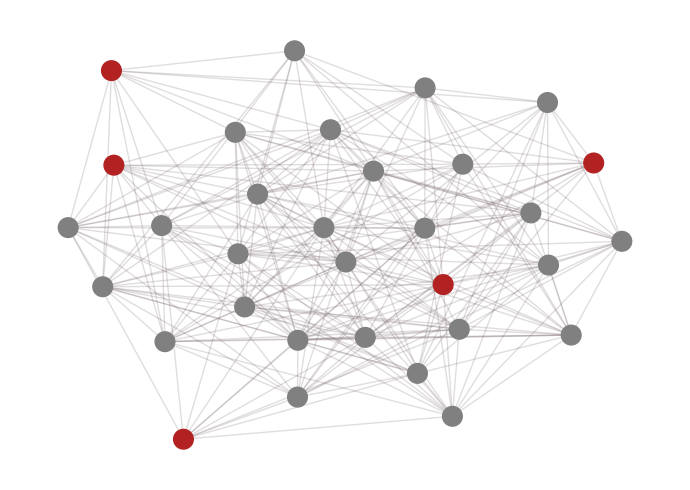

In [7]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=100)
draw_from_nodes(greedy.nodelist, ax=ax, plot_margins=False, use_labels=0, edge_alpha=0.2, edge_color="#68555D", layout_iter=1000, seed=12)
fig.tight_layout()
plt.show()

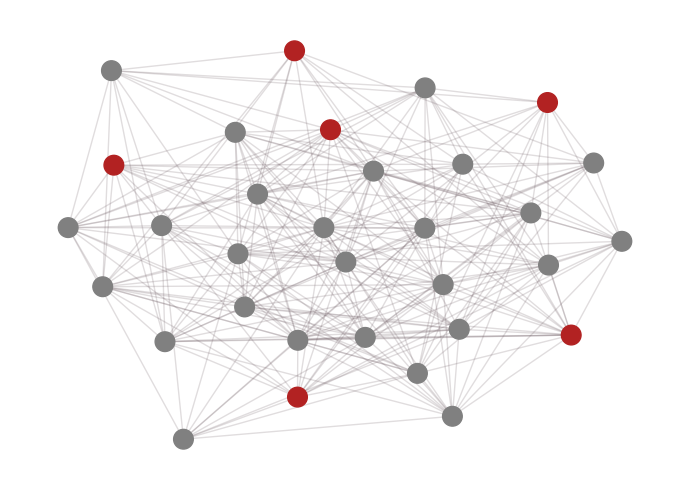

In [8]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=100)
draw_from_nodes(randmulti.nodelist, ax=ax, plot_margins=False, use_labels=0, edge_alpha=0.2, edge_color="#68555D", layout_iter=1000, seed=12)
fig.tight_layout()
plt.show()

In [9]:
draw_selection_gif(
    f"rand_mis_history_loop_{N_POINTS}.gif", randmulti.nodelist, randmulti.history, use_labels=0, edge_alpha=0.2, edge_color="#68555D",
    layout_iter=1000, seed=12, figsize=[7, 5], dpi=200, plot_margins=False,
    duration=500,
)

## ILP

In [10]:
ilp = ilp_mis_from_graph(greedy)

In [11]:
solver = pyo.SolverFactory("appsi_highs")
res = solver.solve(ilp, tee=True)
print(res)

Running HiGHS 1.5.3 [date: 2023-05-16, git hash: 594fa5a9d]
Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
516 rows, 32 cols, 1032 nonzeros
258 rows, 32 cols, 516 nonzeros
70 rows, 32 cols, 344 nonzeros
70 rows, 32 cols, 344 nonzeros
Objective function is integral with scale 1

Solving MIP model with:
   70 rows
   32 cols (32 binary, 0 integer, 0 implied int., 0 continuous)
   344 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   9               -inf                 inf        0      0      0         0     0.0s
 S       0       0         0   0.00%   9               -0                 Large        0      0      0         0     0.0s
         0       0         0   0.00%   7.107142857     -0                 Large        0      0  

In [12]:
# Build new graph from solution
graph = greedy.graph.copy()
graph.deactivate()
colors = []
nodes = []
for n in ilp.N:
    nodes.append(graph.N[n])
    if round(ilp.x[n].value, ndigits=0) == 1:
        graph.N[n].selected = True
        colors.append(1)
    else:
        colors.append(0)

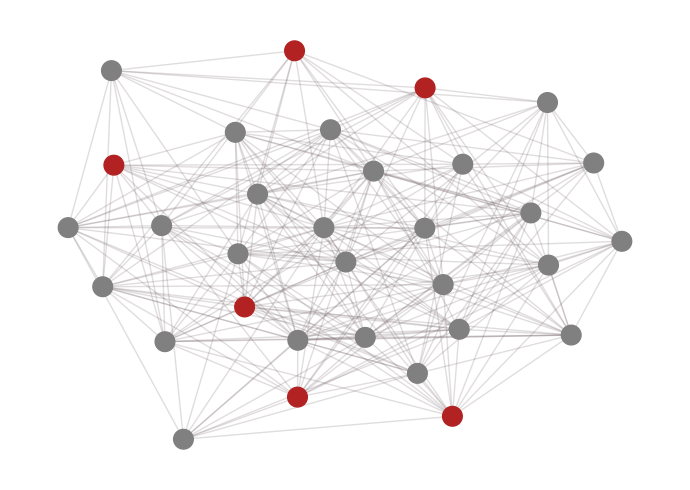

In [13]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=100)
draw_from_nodes(graph.nodelist, ax=ax, plot_margins=False, use_labels=0, edge_alpha=0.2, edge_color="#68555D", layout_iter=1000, seed=12)
fig.tight_layout()
plt.show()